# Практическая работа № 7
## Визуализация данных


На этом занятии мы познакомимся Matplotlib - это мультиплатформенная библиотека для визуализации данных, основанная на массивах NumPy. 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Настройка стиля

*прим.* таблицы стилей поддерживаются только с версии 1.5 библиотеки Matplotlib. В более ранних версиях доступен только стиль по умолчанию.

Чтобы посмотреть, какие стили доступны в вашей версии библиотеки, выполните команду:

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Как установить выбранный стиль:

In [3]:
plt.style.use('classic')

Отображение графиков в блокноте

In [4]:
%matplotlib inline

После выполнения этой команды все создающие графики блоки в блокноте будут содержать PNG -изображение итогового графика. Выполняется 1 раз за сеанс.

*прим.* Если необходимо строить графики из скрипта, необходимо один раз (!) выполнить команду plt.show(), которая откроет окно с графиком

In [5]:
import numpy as np

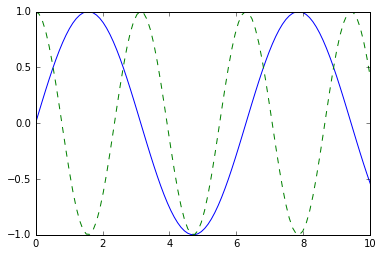

In [6]:
x = np.linspace(0,10,100)
fig = plt.figure()
plt.plot(x, np.sin(x),'-')
plt.plot(x, np.cos(2*x),'--')

Для сохранения графика используется метод savefig:

In [7]:
fig.savefig('sincos.png')

Узнать, какие форматы для сохранения файлов поддерживаются в вашей системе:

In [8]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

У Matlotlib существует 2 интерефейса: интерфейс в стиле Matlab и объектно-ориентированный интерфейс. Какой использовать - дело вкуса, рассмотрим оба. Советую в простых ситуациях использовать стиль Matlab, в более замысловатых - объектно-ориентированный.

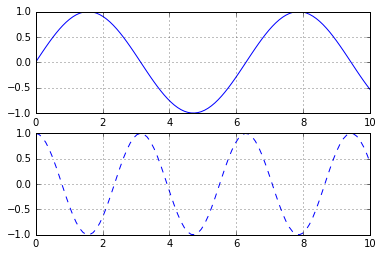

In [9]:
# как в Matlab
plt.figure() #Функция создает "фигуру" - форму, на которой будут размещены все остальные (дочерние) элементы
plt.subplot(2,1,1) # Функция создает оси. Обратите внимание, что тут даже нумерация с 1, а не с 0
plt.plot(x, np.sin(x),'-') # Функция строит график
plt.grid(True) #Включает сетку
plt.subplot(2,1,2)
plt.plot(x, np.cos(2*x),'--')
plt.grid(True)

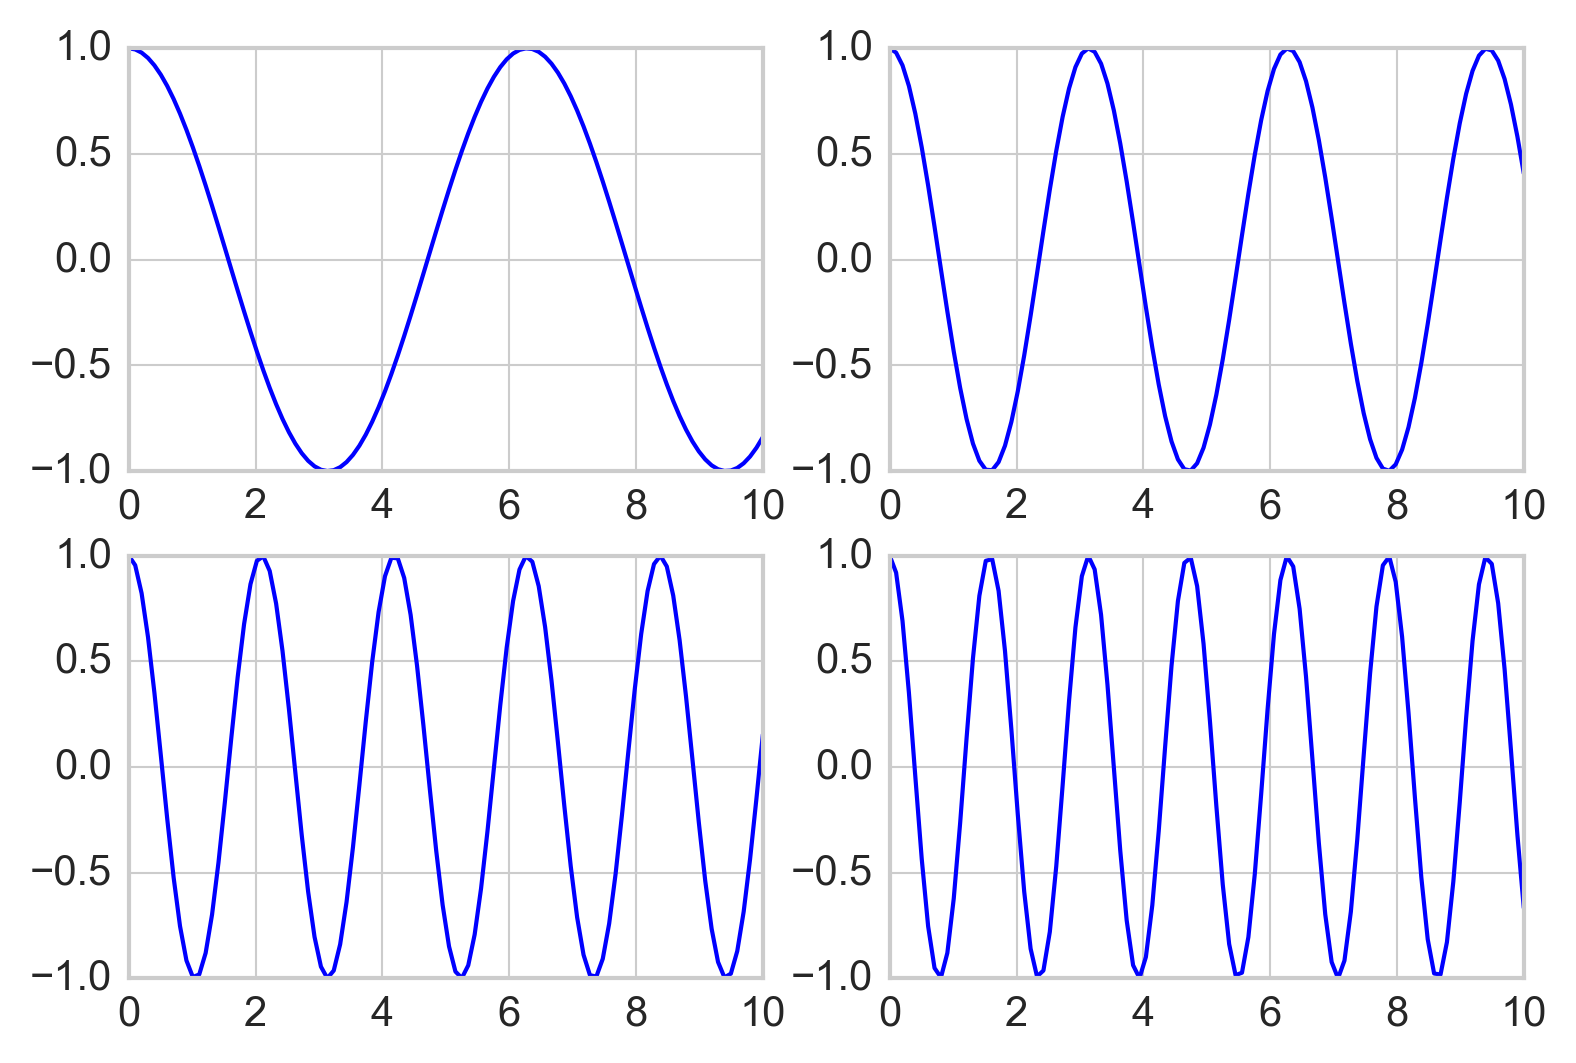

In [10]:
plt.style.use('seaborn-whitegrid')
plt.figure(dpi= 300) #dpi= 300 - dots per inch, т.е. разрешение
for i in range(1,5):    
    plt.subplot(2,2,i)
    plt.plot(x, np.cos(i*x))

Все очень удобно, а для кого-то еще и привычно. Особенность в том, что данный интерфейс сохраняет состояние, т.е. отслеживает текущий рисунок и оси, и для них выполняет все команды plt. Проблемы возникают, когда необходимо позже в сценарии вернуться к какой-то из отстроенных ранее областей и добавить что-то в нее. Это сделать можно, но несколько замысловато. Лучше в этом случае использовать ООП-интерфейс.

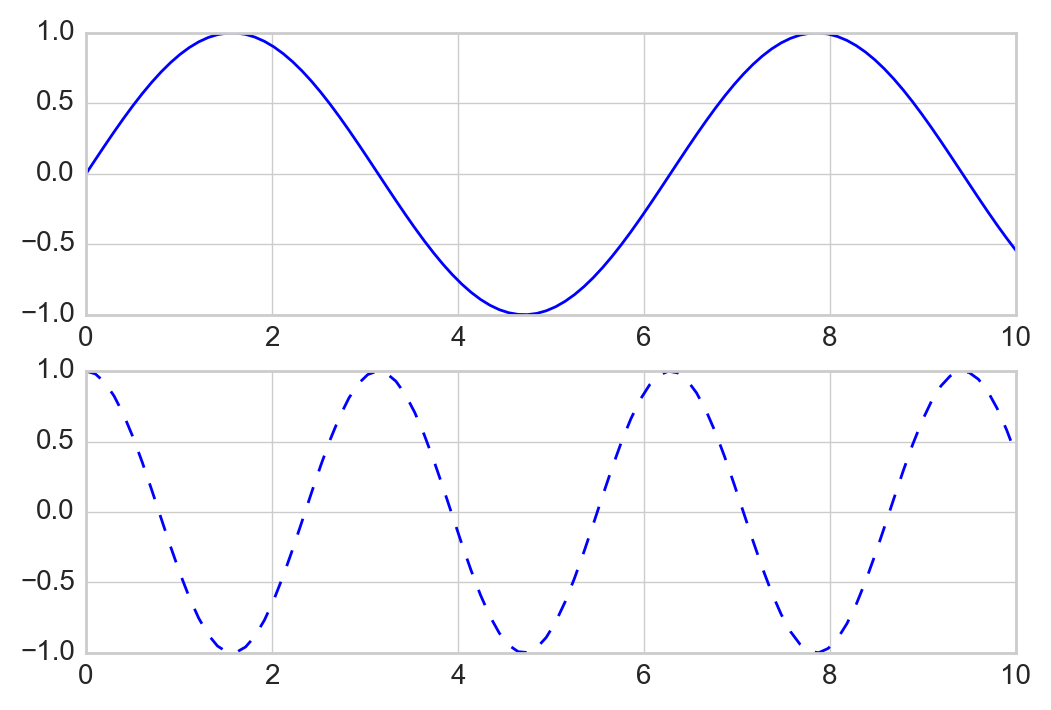

In [11]:
#2 Объектно-ориентированный
fig, ax = plt.subplots(2, dpi= 200)  
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(2*x),'--')


In [12]:
ax

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

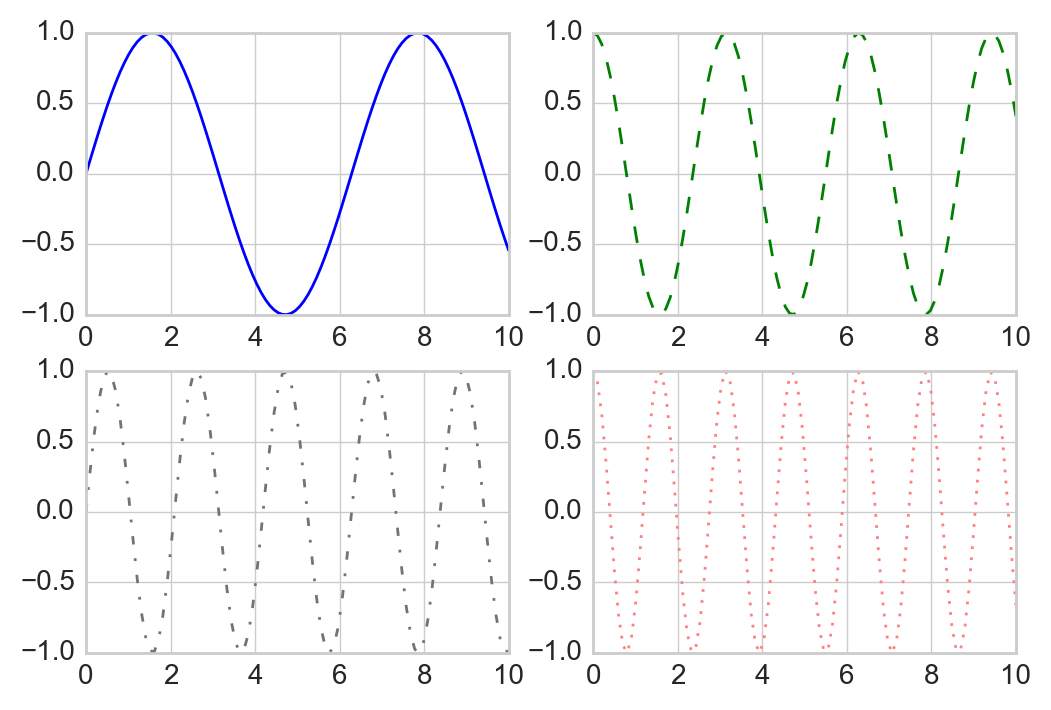

In [13]:
fig, ax = plt.subplots(2,2, dpi= 200)  
ax # Запустить
ax[0,0].plot(x, np.sin(x), color = 'blue', linestyle = '-')
ax[0,1].plot(x, np.cos(2*x), color = 'g', linestyle = '--')
ax[1,0].plot(x, np.sin(3*x), color = '0.45', linestyle = '-.') # шкала оттенков серого в диапазоне от 0 до 1
ax[1,1].plot(x, np.cos(4*x), color = (1, 0.5, 0.5), linestyle = ':') #RGB

Еще можно объединить стиль линии и цвет в одном аргументе, где односимвольные коды цветов - стандартные сокращения, принятые для RGB и CMYK

(0.0, 2.0, 0.0, 8.0)

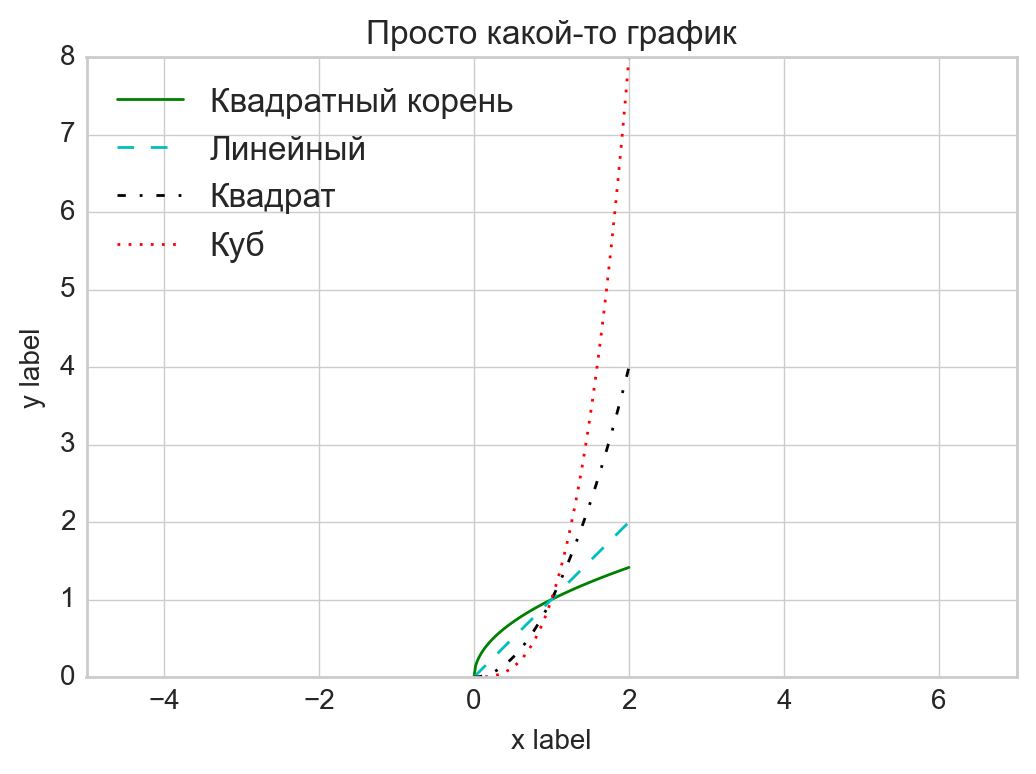

In [14]:
plt.style.use('seaborn-pastel')
x = np.linspace(0, 2, 100)
plt.figure(dpi= 200) #figsize=(12,8)
plt.plot(x, x**0.5,'-g')
plt.plot(x, x,'--c')
plt.plot(x, x**2,'-.k')
plt.plot(x, x**3,':r')
## Название осей
plt.xlabel('x label')
plt.ylabel('y label')
## Название графика
plt.title("Просто какой-то график")
## Легенда
plt.legend(('Квадратный корень','Линейный','Квадрат','Куб'), loc='upper left')

## Настройка пределов
#plt.xlim(0.5,1.5)
#plt.ylim(0,2)

## Можно еще так:
#plt.axis([1,2,1,4])

# Вообще, метод  .axis позволяет делать значительно больше разных вещей, например подгонять оси под график  
#plt.axis('tight')
#или выравнивать масштаб осей
plt.axis('equal')

In [16]:
plt.axis?

Для ООП-интерфейса отличия синтаксиса незначительны, однако имеют место 

(0.0, 2.0)

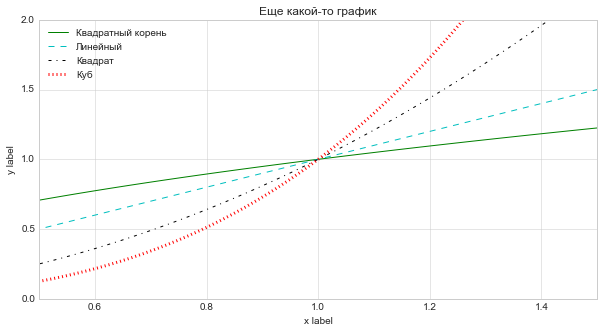

In [17]:
plt.style.use('seaborn-bright')
x = np.linspace(0, 2, 100)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, x**0.5,'-g',label = 'Квадратный корень')
ax.plot(x, x,'--c',label = 'Линейный')
ax.plot(x, x**2,'-.k', label = 'Квадрат')
ax.plot(x, x**3,':r',label = 'Куб',linewidth = 3)
## Название осей
ax.set_xlabel('x label')
ax.set_ylabel('y label')
## Название графика
ax.set_title("Еще какой-то график")
## Легенда
ax.legend(loc='upper left', fontsize = 10)
    ## Настройка пределов
ax.set_xlim(0.5,1.5)
ax.set_ylim(0,2)


Вообще, настройки весьма гибкие. Можно строить всякие странные штуковины:

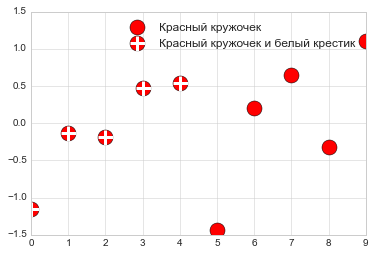

In [18]:
from numpy.random import randn

z = randn(10)

fig, ax = plt.subplots()
red_dot, = ax.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
white_cross, = ax.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

ax.legend([red_dot, (red_dot, white_cross)], ["Красный кружочек", "Красный кружочек и белый крестик"])

In [19]:
plt.plot?

Еще пара слов о настройке стилей: не обязательно использовать готовые стили, можно прописать необходимые параметры в самом начале программы. Параметры по умолчанию хранятся в переменной matplotlib.rcParams, которая является глобальной для всего пакета. 

In [20]:
#large = 22; med = 16; small = 12
#params = {'axes.titlesize': large,
          #'legend.fontsize': med,          
          #'axes.labelsize': med,
          #'axes.titlesize': med,
            
          #'xtick.labelsize': med,
          #'ytick.labelsize': med,
          #'figure.titlesize': large}
#plt.rcParams.update(params)

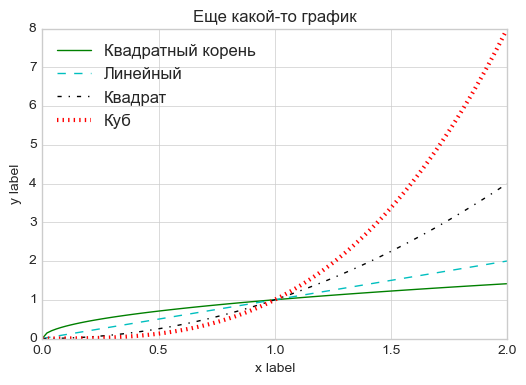

In [21]:
fig, ax = plt.subplots(dpi=100)
ax.plot(x, x**0.5,'-g',label = 'Квадратный корень')
ax.plot(x, x,'--c',label = 'Линейный')
ax.plot(x, x**2,'-.k', label = 'Квадрат')
ax.plot(x, x**3,':r',label = 'Куб',linewidth = 3)
## Название осей
ax.set_xlabel('x label')
ax.set_ylabel('y label')
## Название графика
ax.set_title("Еще какой-то график")
ax.legend(loc='upper left')

Если нужно использовать какой-то экзотический стиль для некоторого блока кода, и не хочется менять глобальный стиль, можно использовать контекстный менеджер

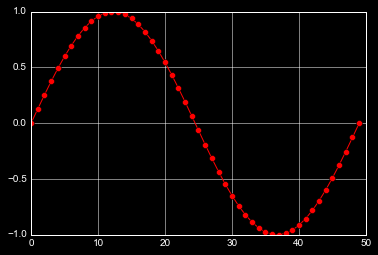

In [22]:
with plt.style.context('dark_background'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')

## Гистограммы и пироги

Для примера использования гистограммы возьмем данные из анкет, с котромы мы уже работали на 5й практике. Например, давайте проанализируем распределение студентов по курсам. 

*прим* не забудьте положить csv-файл с ответами в свою рабочую папку

In [23]:
import csv
with open('Entering_quiz_2.csv', encoding = 'utf8') as csvfile:
    names = ['t','s','spec','cource','Pr_lvl','Py_lvl','Mth_lvl','ML','Wait','Own','En_lvl','OS']
    reader_object = csv.DictReader(csvfile, delimiter = ',',fieldnames = names)
    count = 0
    ans = []
    for row in reader_object:
        temp = row['cource']  
        if temp.isdigit():
            ans.append(int(temp))

In [24]:
cource_data = np.array(ans)

In [25]:
cource_data

array([3, 4, 2, 3, 3, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 3, 4, 2, 3, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 4, 5, 2, 4, 4, 2, 2, 5, 3, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 4, 3, 2])

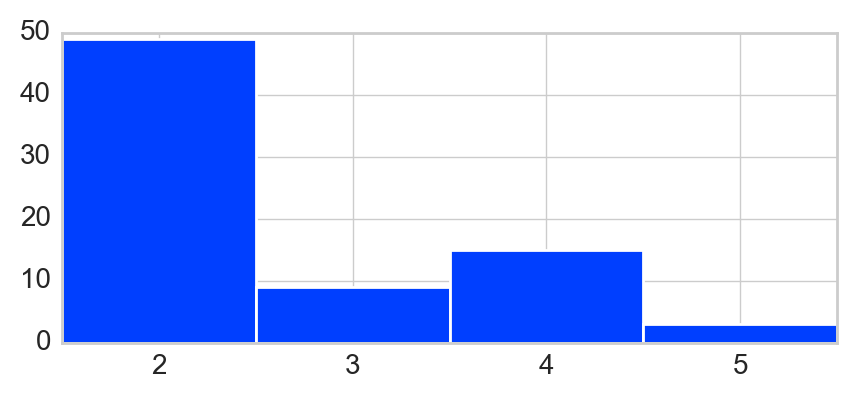

In [26]:
plt.style.use('seaborn-bright')

fig, ax = plt.subplots(figsize=[5,2], dpi = 200)

ax.hist(cource_data, linewidth=1, edgecolor="white", bins = [1.5,2.5,3.5,4.5,5.5])
ax.set_xticks([2,3,4,5])
ax.grid(True)

In [27]:
data = np.histogram(cource_data)

In [28]:
freq = data[0].copy()
freq = freq[freq!=0]
freq

array([49,  9, 15,  3], dtype=int64)

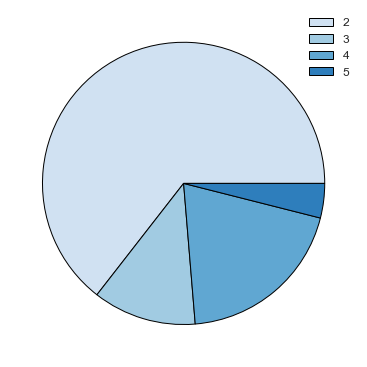

In [29]:
plt.style.use('_mpl-gallery-nogrid')

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(freq)))

# plot
fig, ax = plt.subplots(figsize=[5,5])
ax.pie(freq, colors=colors)
ax.legend([2,3,4,5])

## Выводы

Где почитать про настройку графиков подробнее: https://matplotlib.org